In [11]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


# Database
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Veamos los datos


In [0]:
import pandas as pd

dataset = pd.read_csv("googl.us.txt", delimiter=",")


In [2]:
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.030,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.540,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.740,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.800,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.000,51.940,53.000,9197800,0
5,2004-08-26,52.475,53.975,52.330,53.955,7102000,0
6,2004-08-27,54.050,54.310,52.845,53.075,6218000,0
7,2004-08-30,52.640,52.745,51.005,51.005,5202000,0
8,2004-08-31,51.150,51.855,51.080,51.185,4922800,0
9,2004-09-01,51.350,51.485,49.835,50.125,9147400,0


In [0]:
dataset['Open']

In [4]:
aa = dataset['Open']
aa.shape

(3333,)

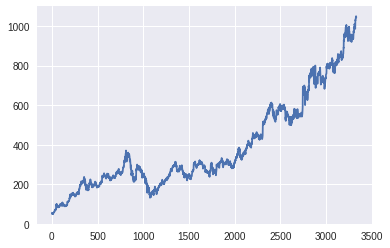

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<Figure size 432x288 with 0 Axes>

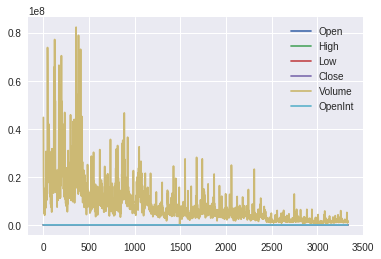

In [6]:

%matplotlib inline
plt.figure()
dataset.plot()

In [0]:
googl_op = dataset['Open']
googl_cl = dataset['Close']

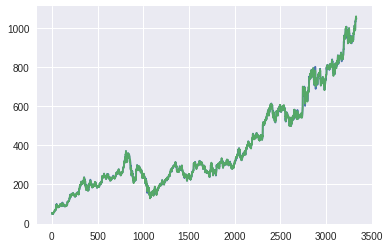

In [0]:
%matplotlib inline
plt.figure()
plt.plot(googl_op)
plt.plot(googl_cl)

In [0]:
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10))
y_test = yy[np.arange(9,1000,10)]

# MODELO

In [12]:
model = Sequential()
capa_1 = Dense(1, input_shape=(10,), trainable = False)
capa_1.trainable = True 
model.add(capa_1)

model.compile(optimizer='adam',loss='mae')


Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 211.5515
Epoch 2/10
200/200 [==============================] - 0s 194us/step - loss: 195.6212
Epoch 3/10
200/200 [==============================] - 0s 235us/step - loss: 179.4875
Epoch 4/10
200/200 [==============================] - 0s 157us/step - loss: 163.4518
Epoch 5/10
200/200 [==============================] - 0s 127us/step - loss: 147.5089
Epoch 6/10
200/200 [==============================] - 0s 132us/step - loss: 131.3943
Epoch 7/10
200/200 [==============================] - 0s 125us/step - loss: 115.4932
Epoch 8/10
200/200 [==============================] - 0s 127us/step - loss: 99.3789
Epoch 9/10
200/200 [==============================] - 0s 136us/step - loss: 83.4685
Epoch 10/10
200/200 [==============================] - 0s 122us/step - loss: 67.3205


In [16]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

100/100 [==============================] - 0s 236us/step


139.91934204101562